# Load dataset

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('data/bank-full.csv', sep= ";")

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Dataset Exploration

### Check Null/Missing Values

In [13]:
# get null value count in dataset
null_values = data.isnull().sum()

In [14]:
null_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Check Duplicate values

In [17]:
# check duplicate values(row) in dataset
duplicates = data.duplicated().sum()

In [18]:
duplicates

0

### Basic Dataset Information

In [31]:
# Get basic info about dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [32]:
# Display a summary of numerical columns
print("Summary Statistics:")
summary = data.describe()
summary

Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Understand the Target Variable

In [37]:
# Analyze the target variable if there is class unbalance problem
print("Class Distribution:")
print(data["y"].value_counts())

Class Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


In [39]:
# check target variables as a percentage
print(data["y"].value_counts() / len(data) * 100)

y
no     88.30152
yes    11.69848
Name: count, dtype: float64


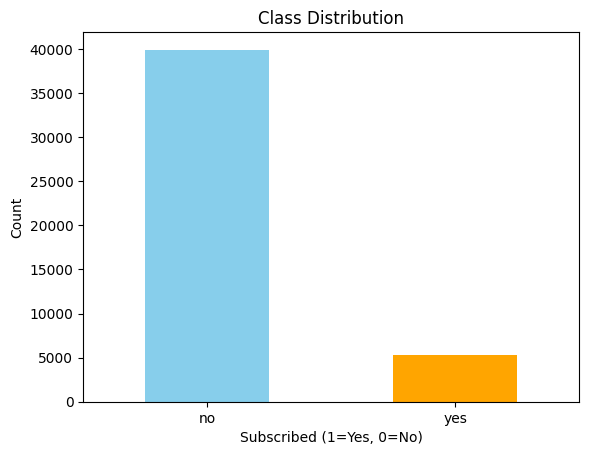

In [40]:
# Visualize class distribution
import matplotlib.pyplot as plt

data[target_col].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Subscribed (1=Yes, 0=No)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Attribute Types and Meta-Information

In [41]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

In [47]:
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Numerical Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


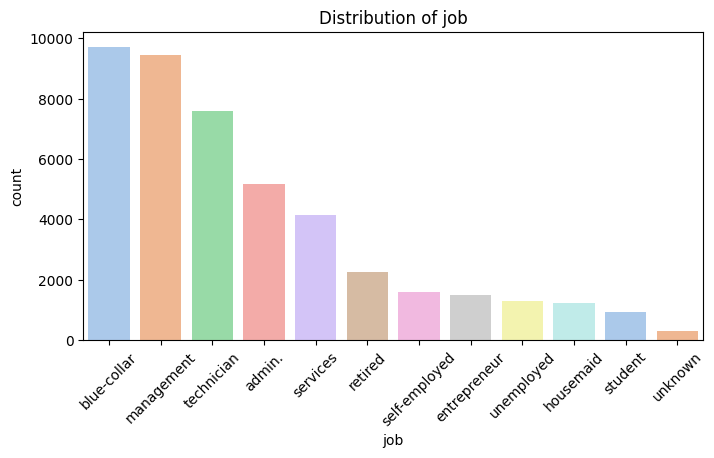

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


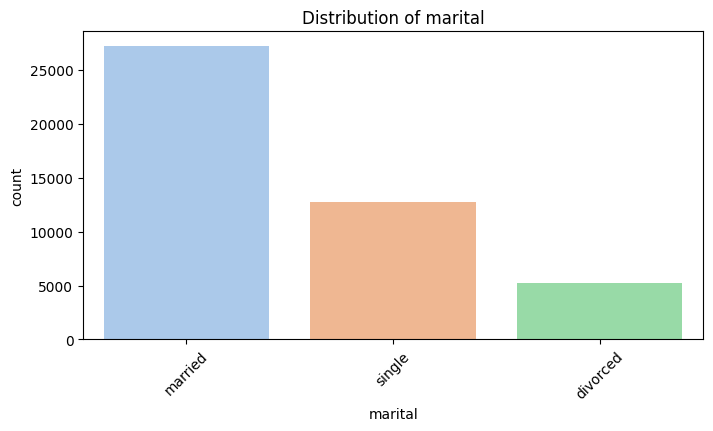

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


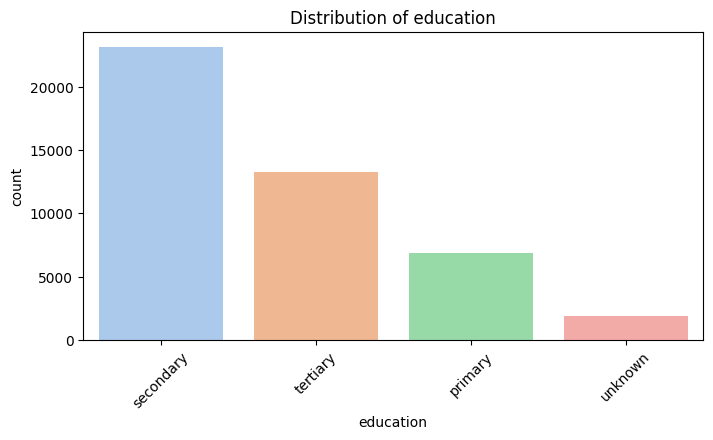

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


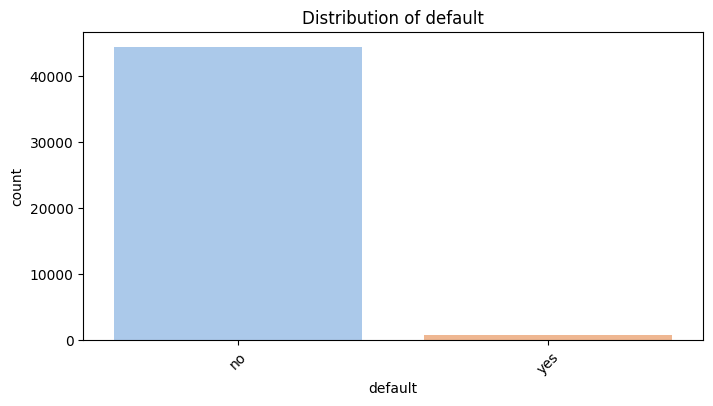

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


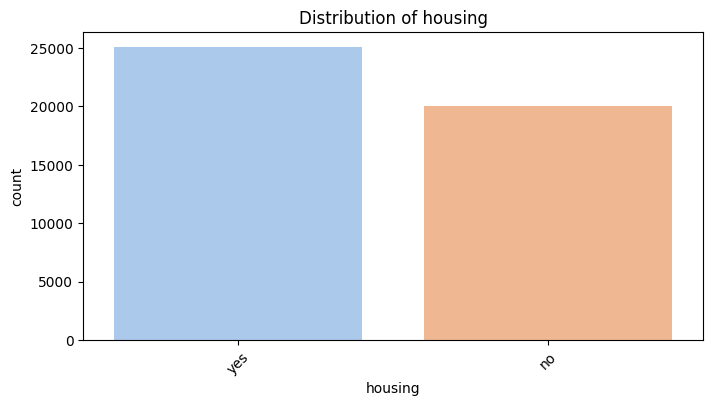

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


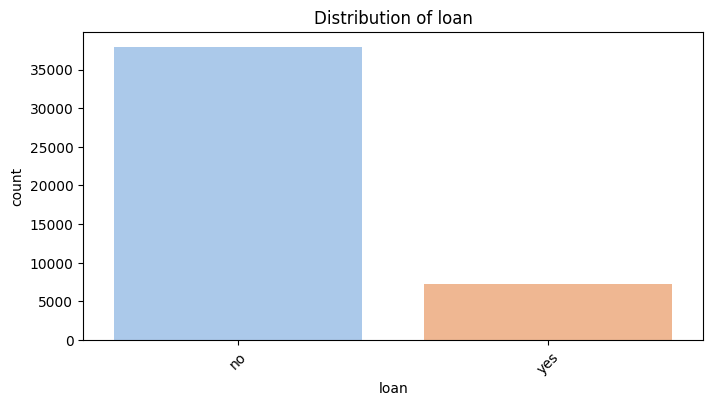

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


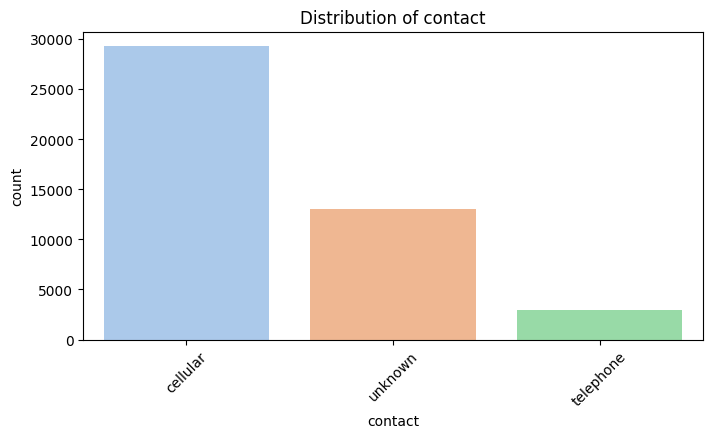

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


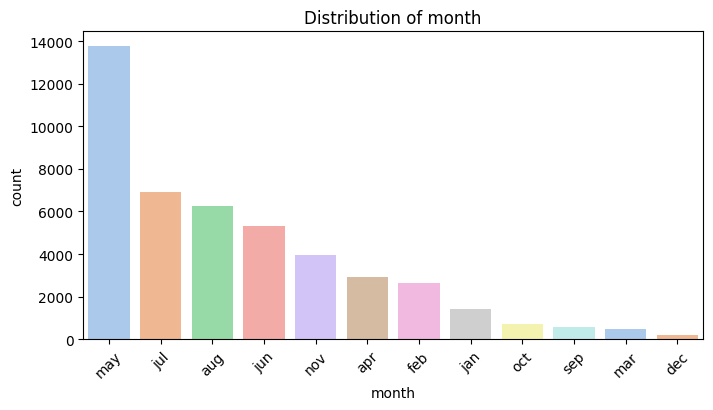

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


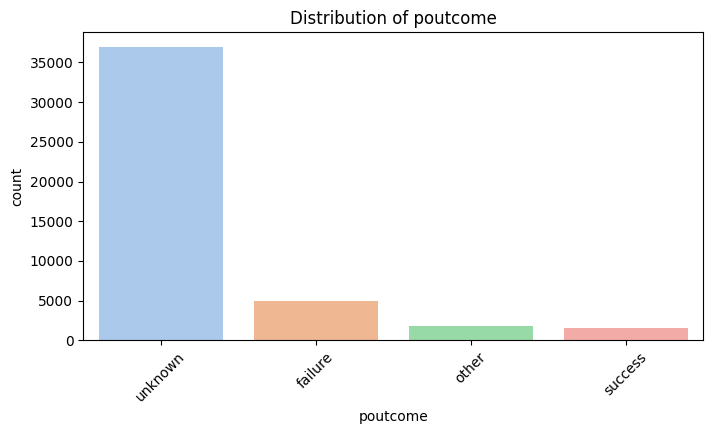

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\753358290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)


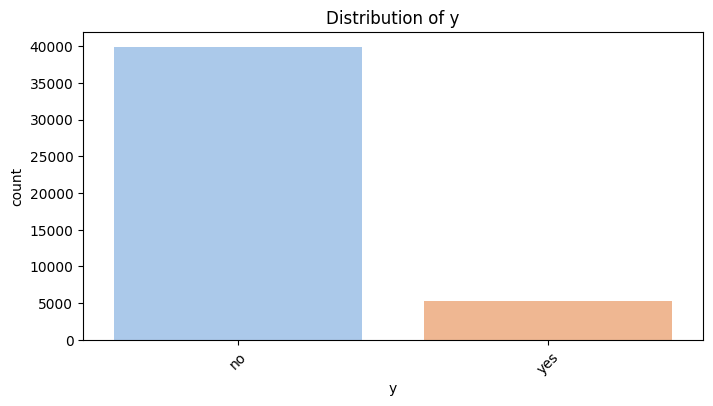

In [54]:
# Visualize distributions of categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette="pastel", order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [48]:
# Value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())


Value Counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value Counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value Counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value Counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value Counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value Counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value Counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value Counts for month:
month
may    13766
jul     68

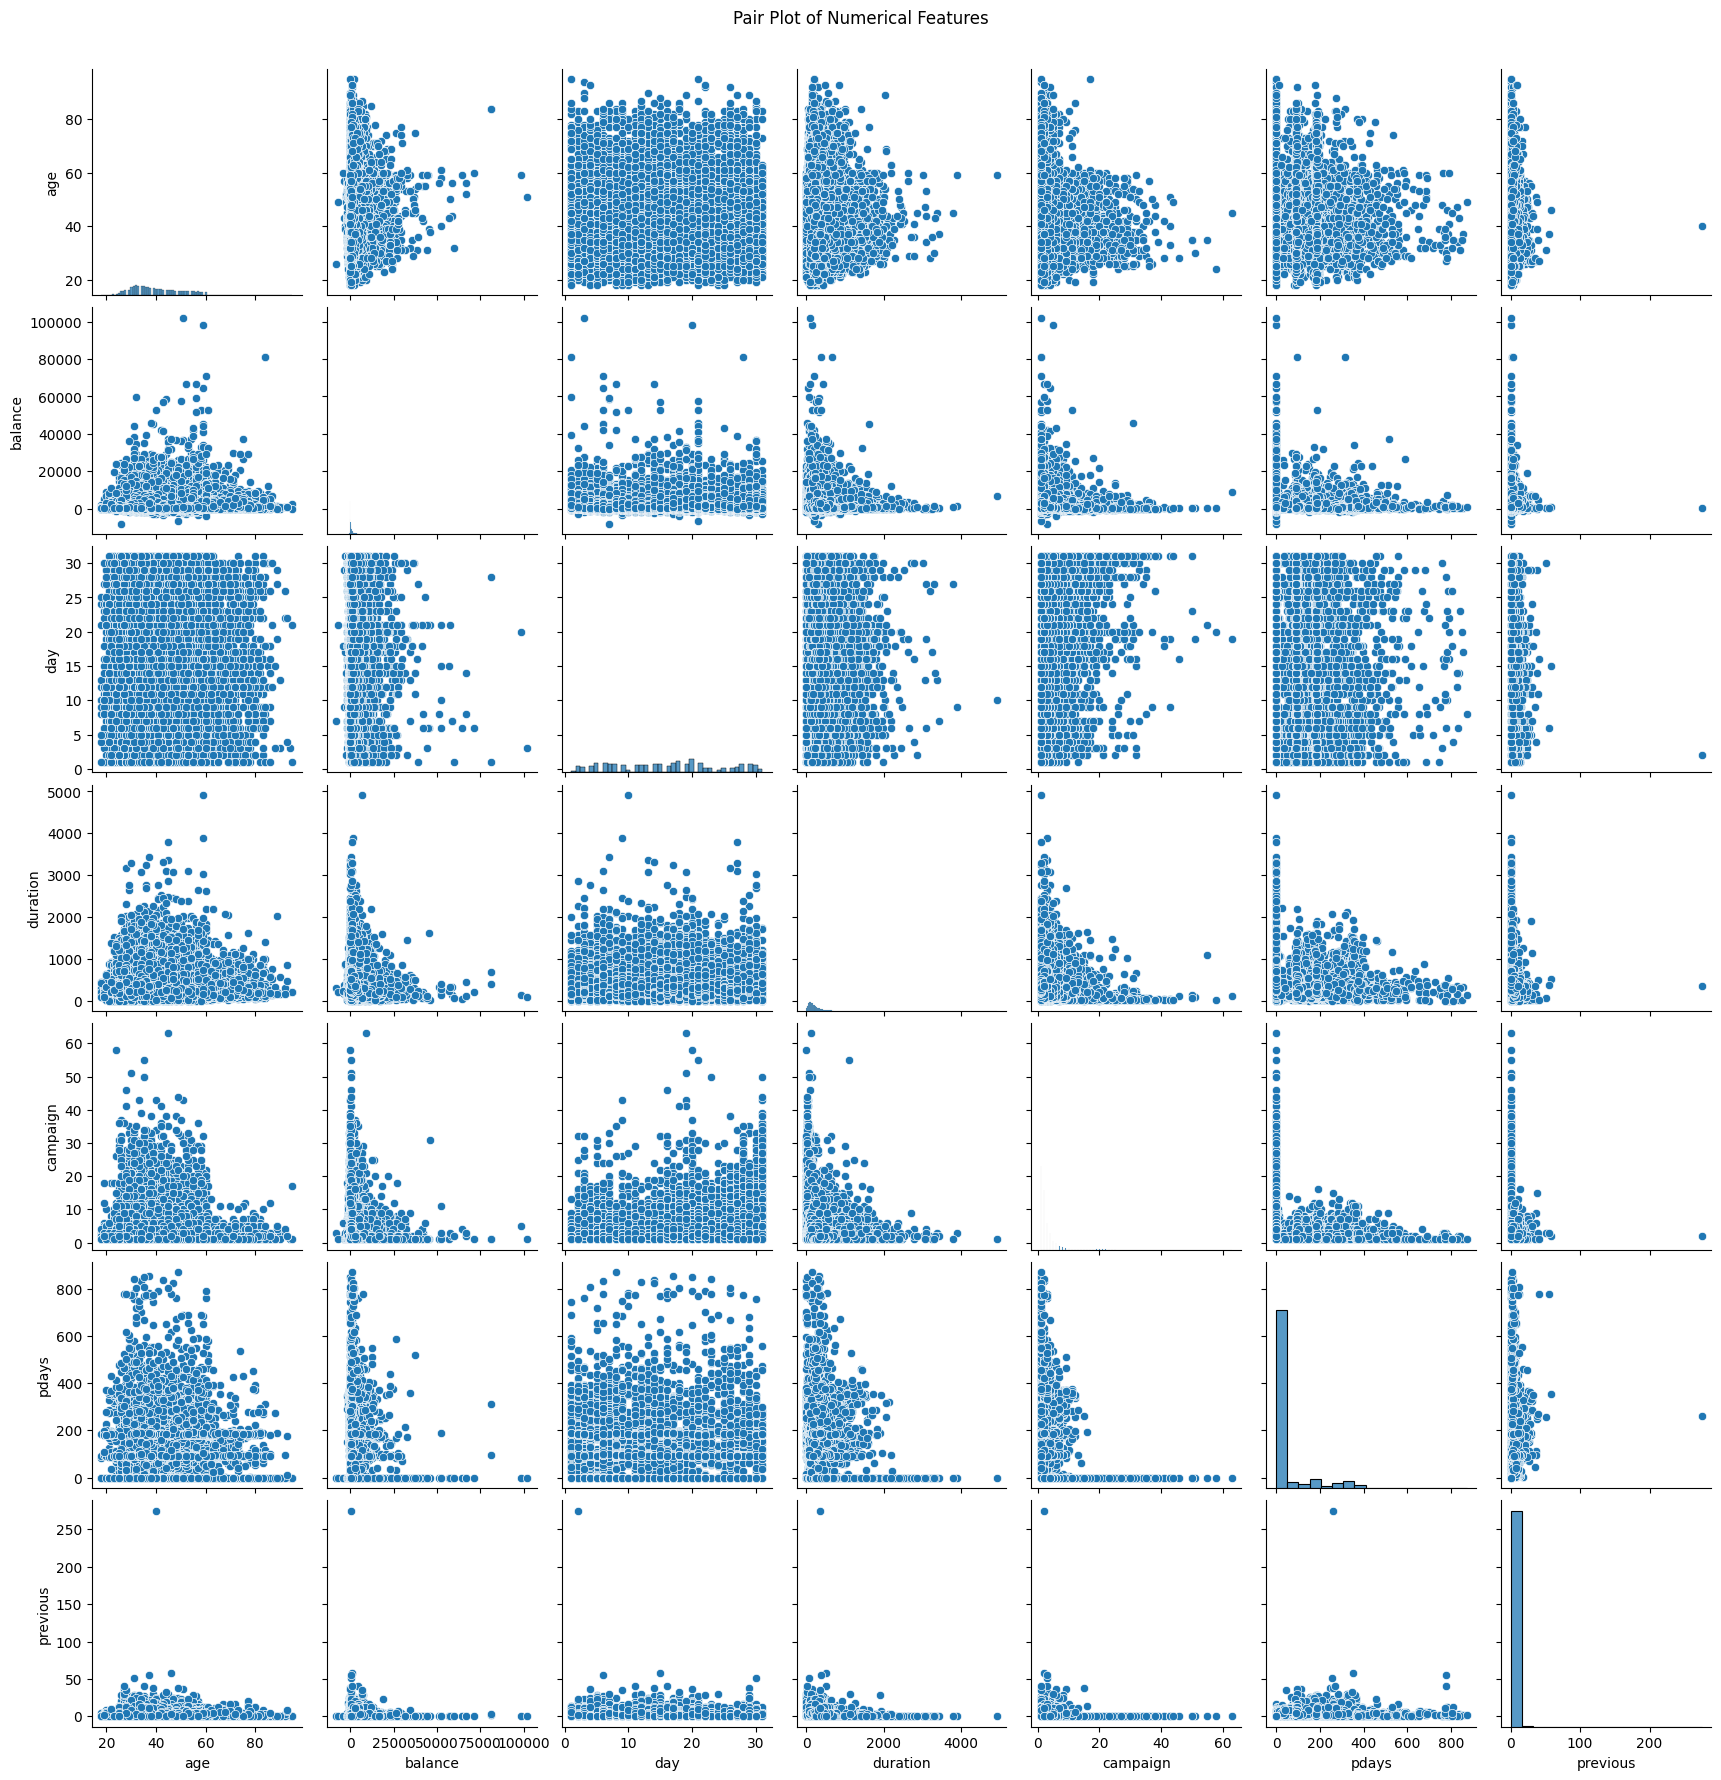

In [55]:
# Pairplot for numerical features
sns.pairplot(data[numerical_cols])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


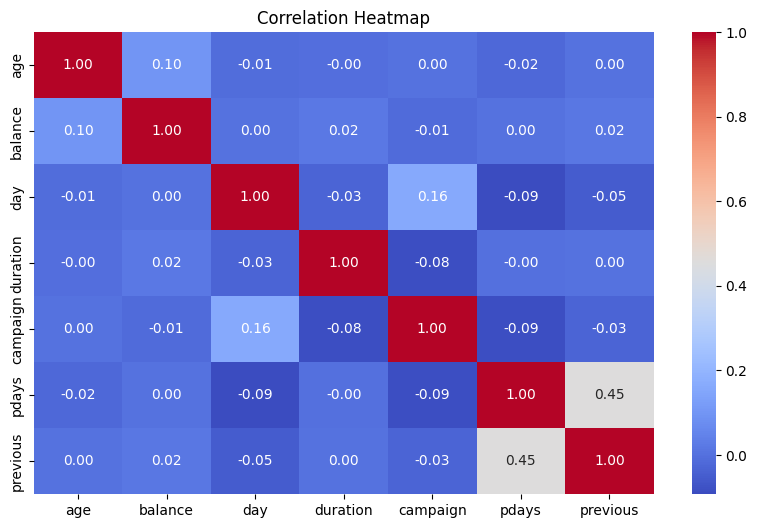

In [56]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


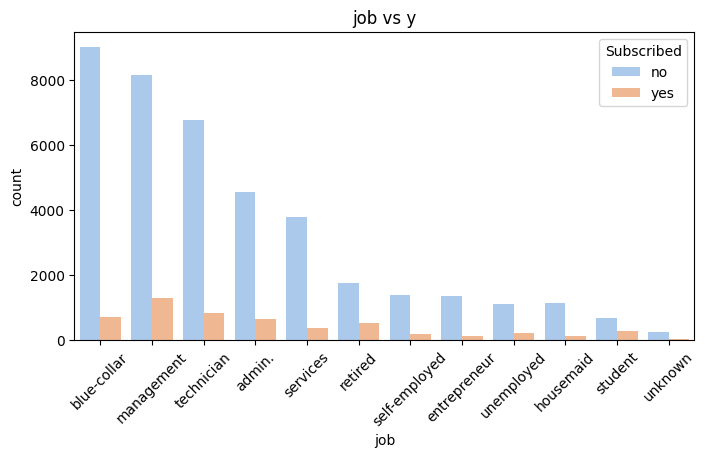

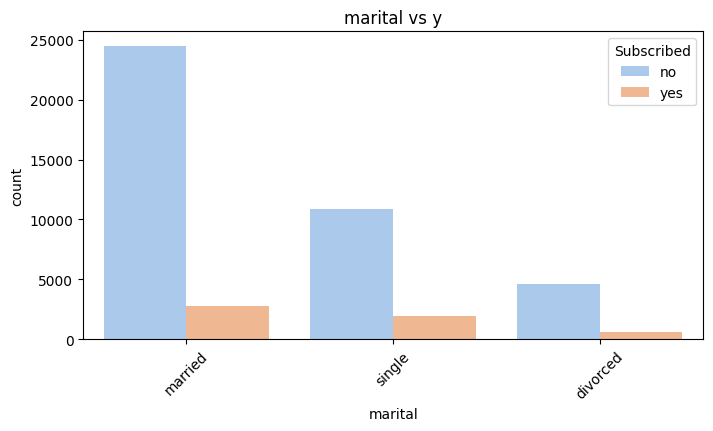

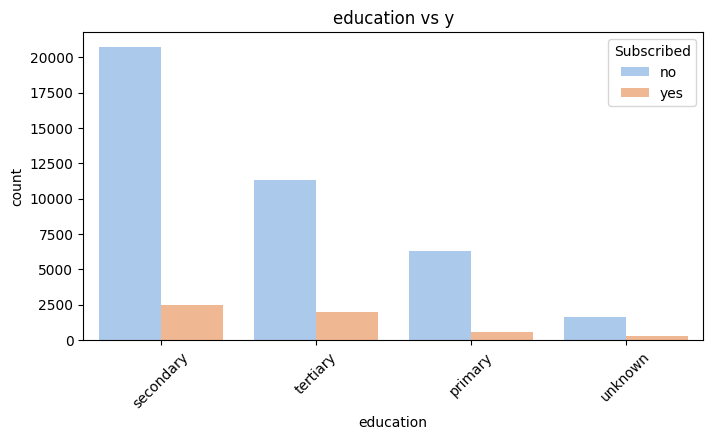

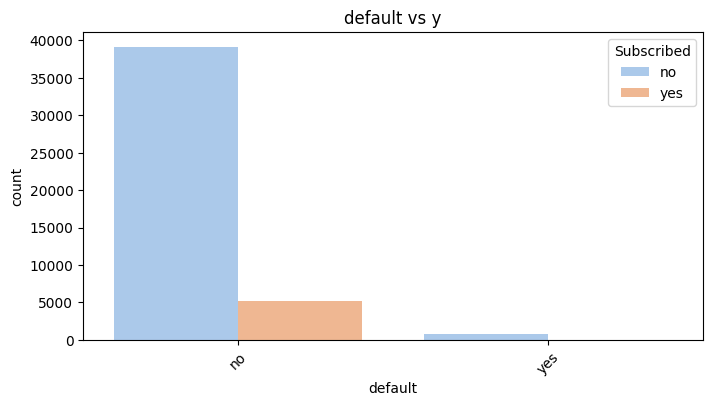

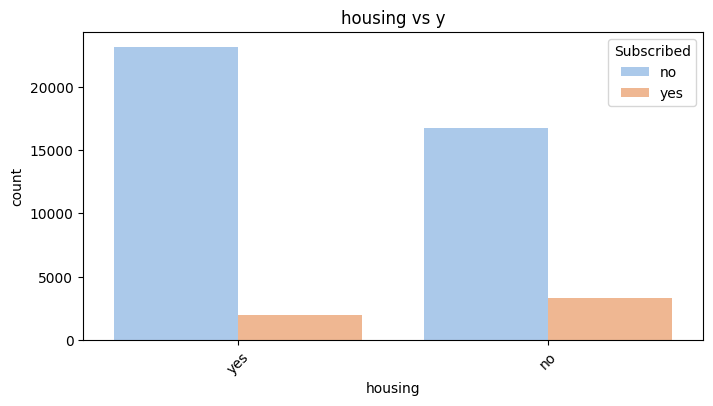

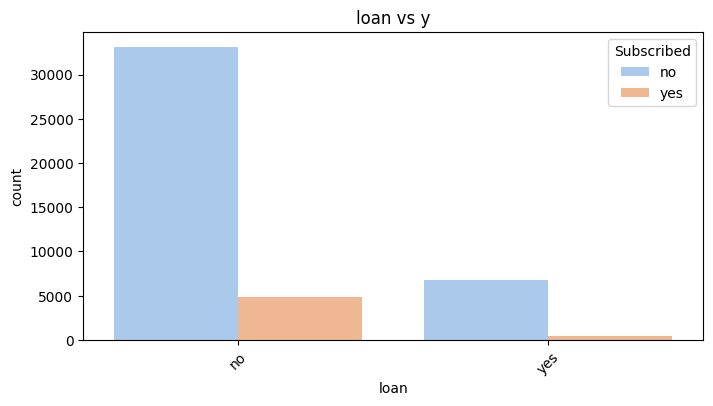

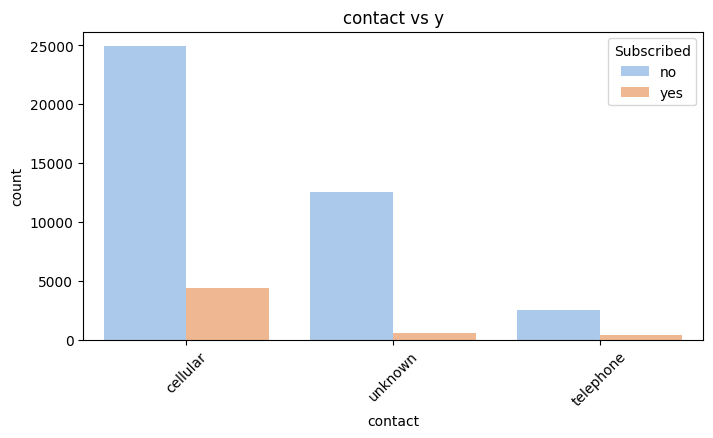

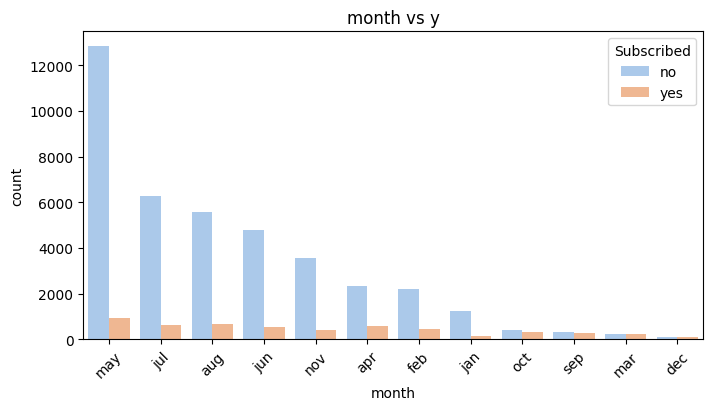

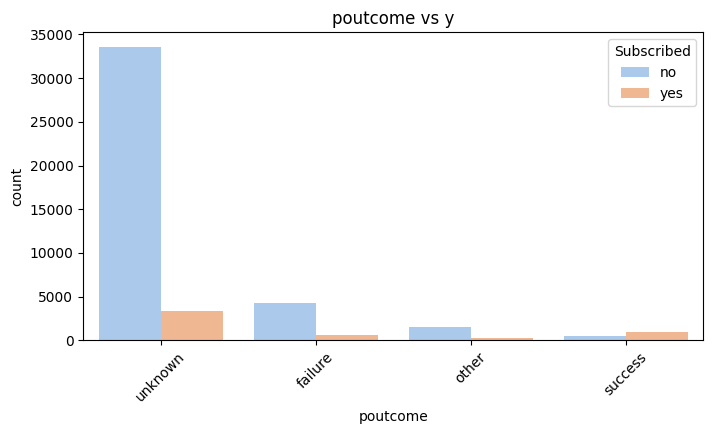

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\4211851189.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Subscribed")


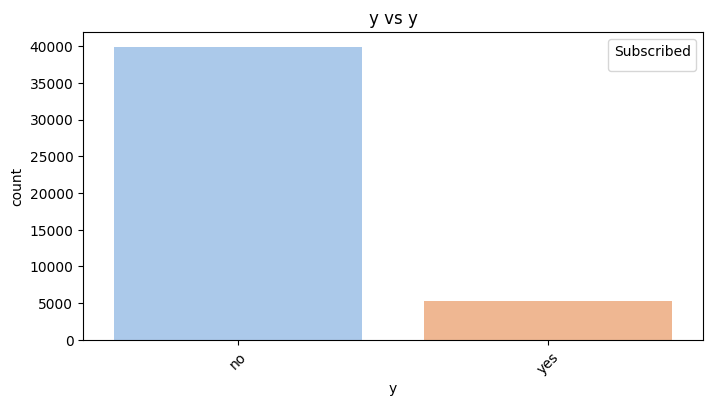

In [57]:
# Count plots for categorical variables vs target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue=target_col, palette="pastel", order=data[col].value_counts().index)
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.legend(title="Subscribed")
    plt.show()


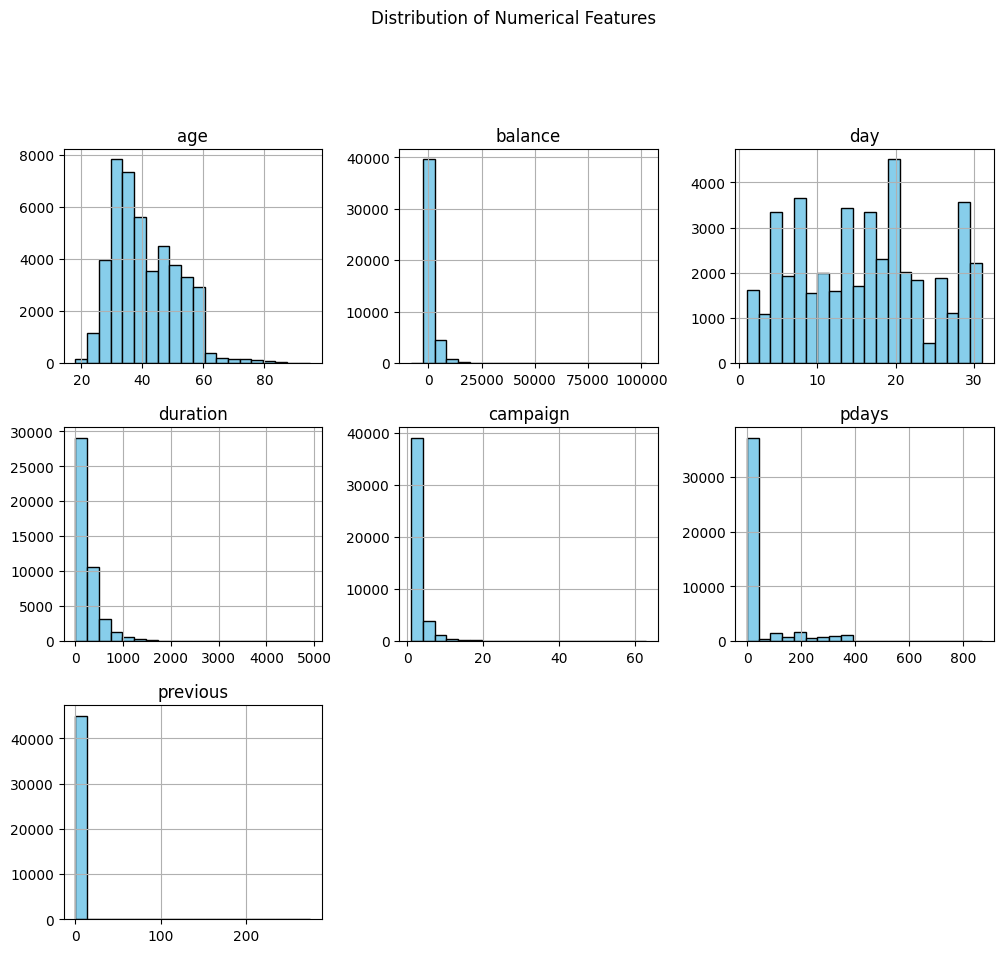

In [59]:
# Histograms for numerical variables
data[numerical_cols].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


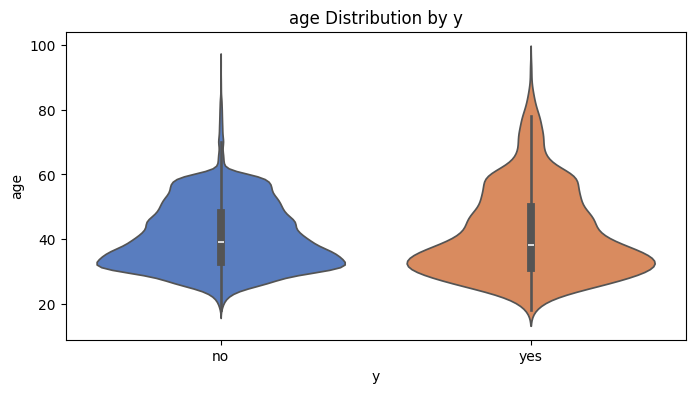

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


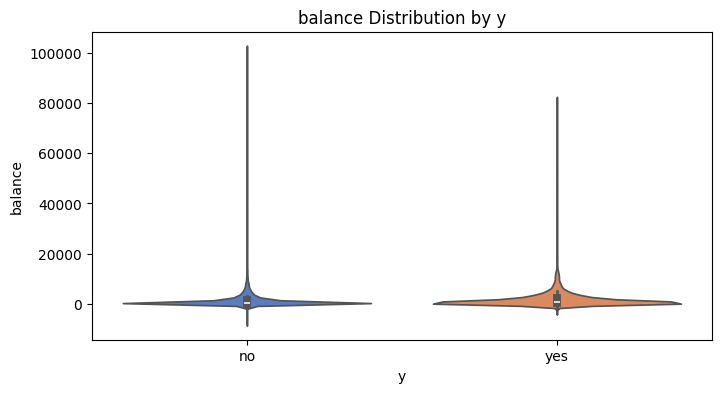

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


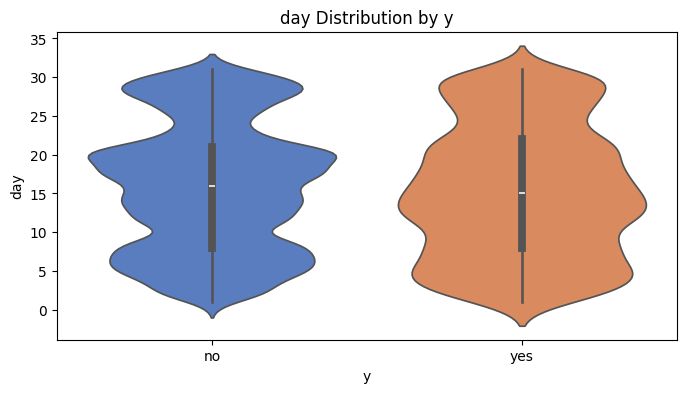

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


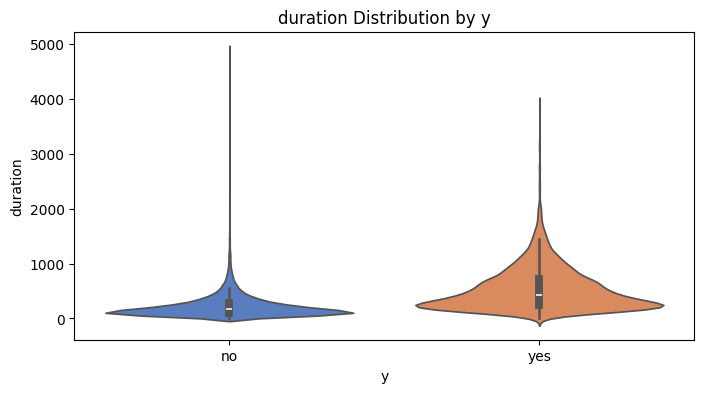

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


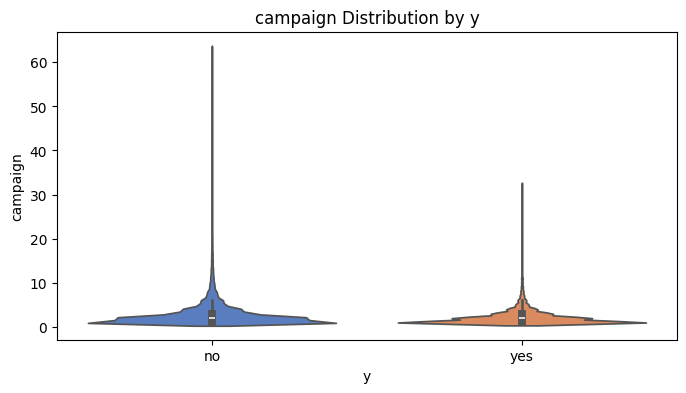

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


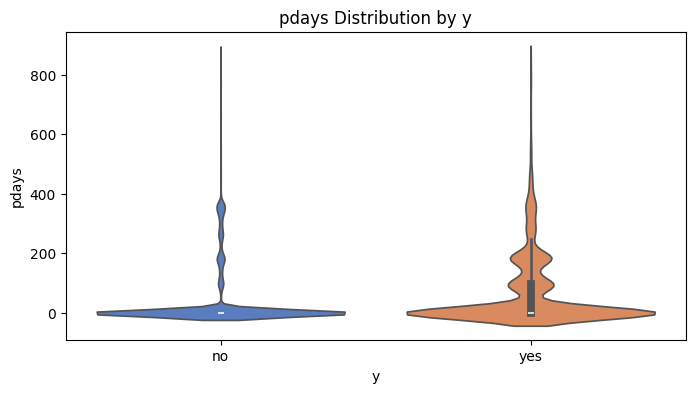

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23092\2956061266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=target_col, y=col, palette="muted")


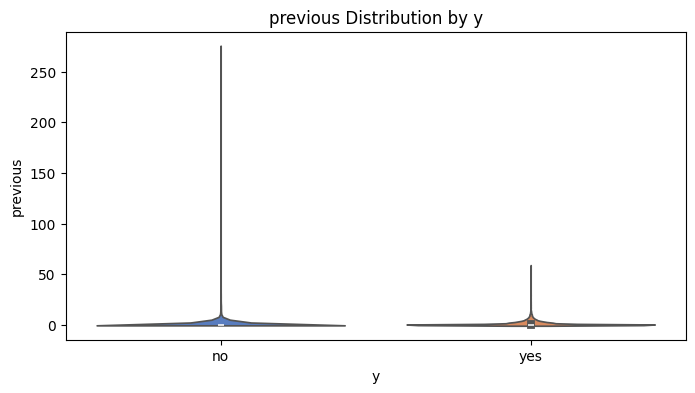

In [58]:
# Violin plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=data, x=target_col, y=col, palette="muted")
    plt.title(f"{col} Distribution by {target_col}")
    plt.show()


### Check for Inconsistencies

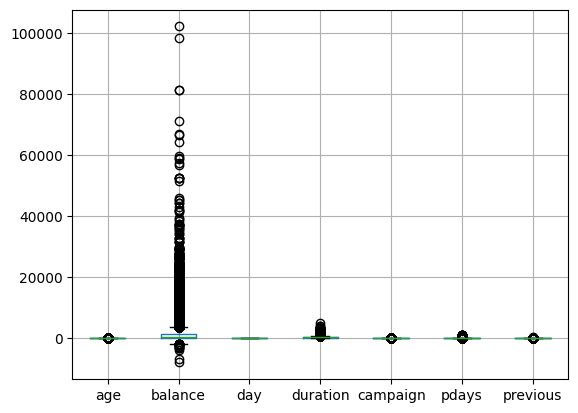

In [52]:
data.iloc[:,:].boxplot()
plt.show()

In [50]:
# Check for unique values in categorical columns
for col in categorical_cols:
    print(f"Unique Values in {col}: {data[col].unique()}")


Unique Values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique Values in marital: ['married' 'single' 'divorced']
Unique Values in education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique Values in default: ['no' 'yes']
Unique Values in housing: ['yes' 'no']
Unique Values in loan: ['no' 'yes']
Unique Values in contact: ['unknown' 'cellular' 'telephone']
Unique Values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique Values in poutcome: ['unknown' 'failure' 'other' 'success']
Unique Values in y: ['no' 'yes']


# Data Cleaning

### Handle Missing or Null Values

In [61]:
# Example: Fill missing values in a numerical column with the mean
data['numerical_column'].fillna(data['numerical_column'].mean(), inplace=True)

KeyError: 'numerical_column'

In [62]:
# Example: Fill missing values in a categorical column with the mode
data['categorical_column'].fillna(data['categorical_column'].mode()[0], inplace=True)


KeyError: 'categorical_column'

In [63]:
# Example: Fill missing values in a categorical column with the mode
data['categorical_column'].fillna(data['categorical_column'].mode()[0], inplace=True)


KeyError: 'categorical_column'

In [64]:
# Drop rows with missing values
data.dropna(inplace=True)


In [65]:
# Drop a column with excessive missing values
data.drop(columns=['column_name'], inplace=True)


KeyError: "['column_name'] not found in axis"

###  Remove Duplicates

In [66]:
# Remove duplicate rows
data = data.drop_duplicates()


In [67]:
print(data.shape)


(45211, 17)


### Handle Outliers

In [73]:
numerical_data = data[numerical_cols]

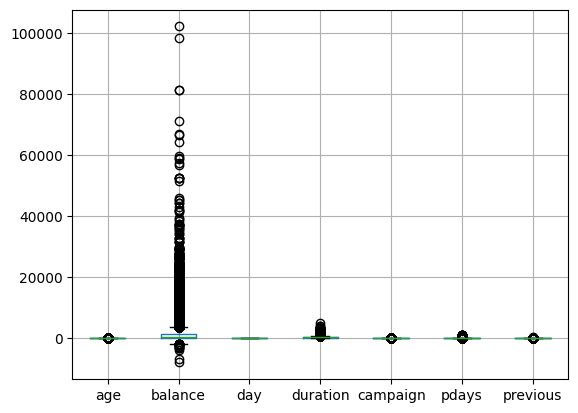

In [79]:
numerical_data.boxplot()
plt.show()


In [84]:
Q1 = numerical_data.iloc[:,0:4].quantile(0.25)
Q3 = numerical_data.iloc[:,0:4].quantile(0.75)

In [85]:
IQR = Q3 - Q1
IQR

age           15.0
balance     1356.0
day           13.0
duration     216.0
dtype: float64

In [90]:
LowerLimit = Q1 - 1.5 * IQR
UpperLimit = Q3 + 1.5 * IQR

In [91]:
numeric_columns = data.select_dtypes(include='number')

In [93]:
numeric_columns

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [95]:
df3 = (numerical_cols < LowerLimit) | (numerical_cols > UpperLimit)

ValueError: Lengths must match to compare

### Fixing Structural Errors

In [96]:
# Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')  # Lowercase and replace spaces with underscores


In [97]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [99]:
# Identify unique values in a column
print(data['marital'].unique())


['married' 'single' 'divorced']


### Validation

In [102]:
import numpy as np

In [103]:
# Identify invalid entries
print(data[data['age'] < 0])  # Example for a numerical column


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [104]:
# Replace invalid values with NaN or correct them
data.loc[data['age'] < 0, 'age'] = np.nan


# Data Transformation

In [106]:
categorical = data[categorical_cols]

In [108]:
categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [109]:
numerical = data[numerical_cols]

In [110]:
numerical

,age,balance,day,duration,campaign,pdays,previous
0,58.0,2143,5,261,1,-1,0
1,44.0,29,5,151,1,-1,0
2,33.0,2,5,76,1,-1,0
3,47.0,1506,5,92,1,-1,0
4,33.0,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51.0,825,17,977,3,-1,0
45207,71.0,1729,17,456,2,-1,0
45208,72.0,5715,17,1127,5,184,3
45209,57.0,668,17,508,4,-1,0


In [123]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

In [115]:
# One-Hot Encoding for categorical variables like 'job', 'education', 'contact', etc.
data = pd.get_dummies(data, columns=['job', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Display the transformed data
print(data.head())


    age  marital default  balance housing loan  day  duration  campaign  \
0  58.0  married      no     2143     yes   no    5       261         1   
1  44.0   single      no       29     yes   no    5       151         1   
2  33.0  married      no        2     yes  yes    5        76         1   
3  47.0  married      no     1506     yes   no    5        92         1   
4  33.0   single      no        1      no   no    5       198         1   

   pdays  ...  month_jul month_jun  month_mar  month_may  month_nov  \
0     -1  ...      False     False      False       True      False   
1     -1  ...      False     False      False       True      False   
2     -1  ...      False     False      False       True      False   
3     -1  ...      False     False      False       True      False   
4     -1  ...      False     False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0      False      False           False     

In [116]:
# Label Encoding for ordinal categorical variables
label_encoder = LabelEncoder()

# Columns to label encode
columns_to_encode = ['marital', 'default', 'housing', 'loan', 'y']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Display the transformed data
print(data.head())


    age  marital  default  balance  housing  loan  day  duration  campaign  \
0  58.0        1        0     2143        1     0    5       261         1   
1  44.0        2        0       29        1     0    5       151         1   
2  33.0        1        0        2        1     1    5        76         1   
3  47.0        1        0     1506        1     0    5        92         1   
4  33.0        2        0        1        0     0    5       198         1   

   pdays  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
0     -1  ...      False      False      False       True      False   
1     -1  ...      False      False      False       True      False   
2     -1  ...      False      False      False       True      False   
3     -1  ...      False      False      False       True      False   
4     -1  ...      False      False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0      False      Fa

In [117]:
data

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,1,0,2143,1,0,5,261,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,44.0,2,0,29,1,0,5,151,1,-1,...,False,False,False,True,False,False,False,False,False,True
2,33.0,1,0,2,1,1,5,76,1,-1,...,False,False,False,True,False,False,False,False,False,True
3,47.0,1,0,1506,1,0,5,92,1,-1,...,False,False,False,True,False,False,False,False,False,True
4,33.0,2,0,1,0,0,5,198,1,-1,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,1,0,825,0,0,17,977,3,-1,...,False,False,False,False,True,False,False,False,False,True
45207,71.0,0,0,1729,0,0,17,456,2,-1,...,False,False,False,False,True,False,False,False,False,True
45208,72.0,1,0,5715,0,0,17,1127,5,184,...,False,False,False,False,True,False,False,False,True,False
45209,57.0,1,0,668,0,0,17,508,4,-1,...,False,False,False,False,True,False,False,False,False,True


In [120]:
# Define the columns to normalize
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Apply Min-Max Scaling
scaler_min_max = MinMaxScaler()
data[numerical_cols] = scaler_min_max.fit_transform(data[numerical_cols])

# Display the transformed data
print(data.head())


        age  marital  default   balance  housing  loan  day  duration  \
0  0.519481        1        0  0.092259        1     0    5  0.053070   
1  0.337662        2        0  0.073067        1     0    5  0.030704   
2  0.194805        1        0  0.072822        1     1    5  0.015453   
3  0.376623        1        0  0.086476        1     0    5  0.018707   
4  0.194805        2        0  0.072812        0     0    5  0.040260   

   campaign  pdays  ...  month_jul  month_jun  month_mar  month_may  \
0       0.0    0.0  ...      False      False      False       True   
1       0.0    0.0  ...      False      False      False       True   
2       0.0    0.0  ...      False      False      False       True   
3       0.0    0.0  ...      False      False      False       True   
4       0.0    0.0  ...      False      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0      False      False      False           False            

In [121]:
data

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,1,0,0.092259,1,0,5,0.053070,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
1,0.337662,2,0,0.073067,1,0,5,0.030704,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
2,0.194805,1,0,0.072822,1,1,5,0.015453,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
3,0.376623,1,0,0.086476,1,0,5,0.018707,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
4,0.194805,2,0,0.072812,0,0,5,0.040260,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,1,0,0.080293,0,0,17,0.198658,0.032258,0.000000,...,False,False,False,False,True,False,False,False,False,True
45207,0.688312,0,0,0.088501,0,0,17,0.092721,0.016129,0.000000,...,False,False,False,False,True,False,False,False,False,True
45208,0.701299,1,0,0.124689,0,0,17,0.229158,0.064516,0.212156,...,False,False,False,False,True,False,False,False,True,False
45209,0.506494,1,0,0.078868,0,0,17,0.103294,0.048387,0.000000,...,False,False,False,False,True,False,False,False,False,True


In [124]:
# Apply Z-Score Standardization
scaler_standard = StandardScaler()
data[numerical_cols] = scaler_standard.fit_transform(data[numerical_cols])

# Display the transformed data
print(data.head())


        age  marital  default   balance  housing  loan  day  duration  \
0  1.606965        1        0  0.256419        1     0    5  0.011016   
1  0.288529        2        0 -0.437895        1     0    5 -0.416127   
2 -0.747384        1        0 -0.446762        1     1    5 -0.707361   
3  0.571051        1        0  0.047205        1     0    5 -0.645231   
4 -0.747384        2        0 -0.447091        0     0    5 -0.233620   

   campaign     pdays  ...  month_jul  month_jun  month_mar  month_may  \
0 -0.569351 -0.411453  ...      False      False      False       True   
1 -0.569351 -0.411453  ...      False      False      False       True   
2 -0.569351 -0.411453  ...      False      False      False       True   
3 -0.569351 -0.411453  ...      False      False      False       True   
4 -0.569351 -0.411453  ...      False      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0      False      False      False          

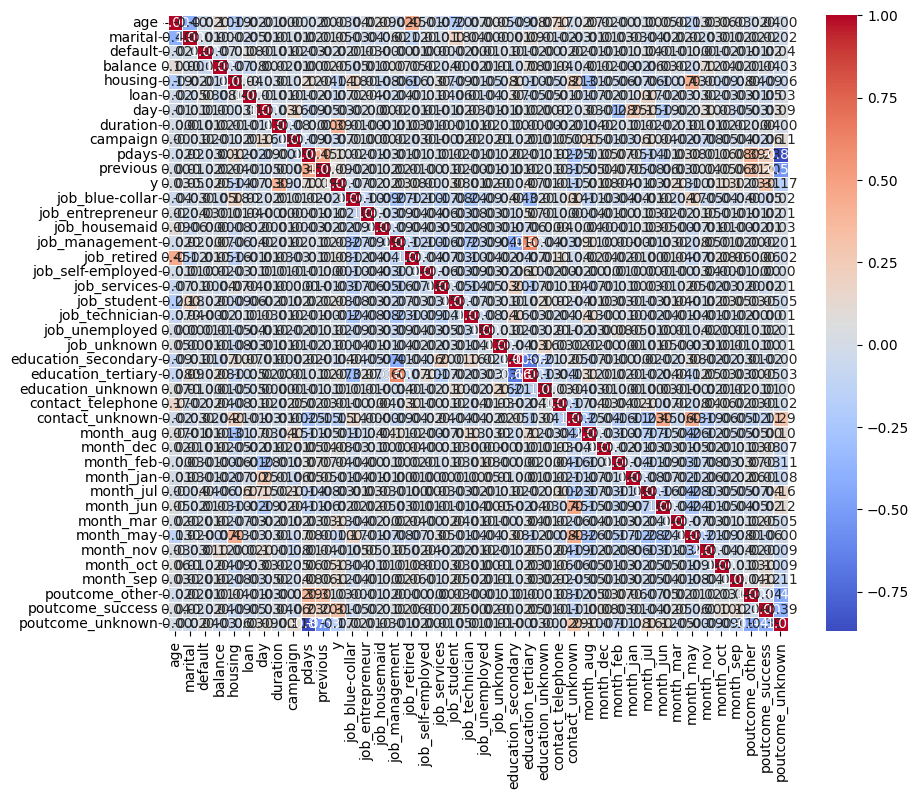

Dropped Columns: ['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Identify and drop highly correlated features (threshold = 0.9)
threshold = 0.9
drop_cols = [column for column in correlation_matrix.columns if any(abs(correlation_matrix[column]) > threshold)]
data_cleaned = data.drop(columns=drop_cols)

# Display the cleaned data
print("Dropped Columns:", drop_cols)
print(data_cleaned.head())


# Data Reduction

In [126]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt